# INDIAN START-UP ECOSYSTEM PROJECT

## Business Understanding

In this project, I am going to focus on the details of funding for these start-ups in India, where I will dive deep into a data containing all the details about fundings received by the start-ups, from 2018 to 2021 and communicate my findings and recommendations to the team in the best way possible.

Some hypotheses I will be testing for this project are as follows;
I will be getting deep into Hypothesis testing later in the project (Outlining the Null and Alternate Hypotheses)


1. Startups headquartered in major metropolitan areas of India likely to receive higher funding amounts than other areas.

2. Startups with multiple investors are likely to receive higher amounts of funding in India.

3. Funding amounts vary across sectors.




I will be focusing on answering the following  business questions:

1. what is the overall trend in funding amounts over the specified time period? 
   - Total and average funding amounts over the years?

2. Which year had the most investors?

3. Which startups received the highest funding amount for each year?
   - Which sectors are those companies from?
   - What does these companies do?

4. What are the top 5 and bottom 5 start-ups according to funding amount and Which sectors are they from?

5. What are the top 5 and bottom 5 sectors by Total Funding amount received?

6. What is the number of startups by sectors?

7. Top 10 HQ locations by average funding amounts.
   
8. What is the number of fundings per HQ locations?

9. What is the average amount of funds received by startups at different stages?

10. What is the average number of founders per startup?
    - Show a distribution plot of the number of founders.

### Installing the needed libraries

Fisrt I go ahead to install all the required libraries

In [138]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings
from scipy import stats
import statistics as stat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### Initializing environment variables

To connect to one of the data sources(a database) I'll be working with, I need some credentials (username, password etc.) which cannot be shared or cannot be shown to the public, therefore I need to create a .env file which is going to house the environment variables. This environment variable will be used in creating a connection string to help connect to the database.

In [139]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
login=environment_variables.get("LOGIN")
password=environment_variables.get("PASSWORD")

# creating connection to database
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"

In [140]:
# Using the connect method of the pyodbc library, I go ahead to pass in the connection string.
# This will connect to the server

connection=pyodbc.connect(connection_string)

## Data Understanding

The data for this project will be extracted from 3 different sources, as funding data for 2020 and 2021 are hosted on an SQL Server database, funding data for 2018 is hosted in a Github repository and 2019's funding data is hosted on a OneDrive.

First, I connect to the database to see the tables contained in it. I then go ahead to extract the data for 2020 and 2021 by assigning them appropriate variable names.

Data hosted on Github and OneDrive were downloaded to my local storage and then read in from there. 2018's data as a CSV file while data for 2019 is an excel file.

below are the common fields/columns for 2019, 2020 and 2021 and their descriptions

| Field           | Description                                                     |
|-----------------|-----------------------------------------------------------------|
| Company_Brand   | Name of start-up company                                        |
| Founded         | Year it was founded                                             |
| HeadQuarter     | Headquarters or location of the company                         |
| Sector          | Sector of the company                                           |
| What_it_does    | A brief description of what the company does                    |
| Founders        | Name(s) of the founder(s) of the company                        |
| Investor        | Name(s) of the investor(s) of the company                       |
| Amount          | Amount invested into the company by investor(s)                 |
| Stage           | Current stage of the startup (e.g. Pre-seed, Pre-series, Series A, Series D) |


2018 had different column names but most had the same meaning as the columns for 2019, 2020 and 2021

| Field           | Description                                                     |
|-----------------|-----------------------------------------------------------------|
| Company Name    | Name of start-up company                                        |
| Industry        | Sector of the company                                           |
| Round/Series    | Current stage of the startup                                    |
| Amount          | Amount invested into the company by investor(s)                 |
| Location        | Headquarters or location of the company                         |
| About Company   | A brief description of what the company does                    |            



A year column will be later added to data during data preparation. Now Because 2019,2020 and 2020 have similar or the same columns, columns for 2018 will changed to look just like the other 3 so as to make concatenation easy. The columns for the other 3 might also be tweaked to meet the requirements.



In [141]:
# Let's see have a look at the tables in the database
query = ''' SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE' '''

tables=pd.read_sql(query,connection)
print(tables)


  TABLE_CATALOG TABLE_SCHEMA               TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP1_startup_funding2021  BASE TABLE
1         dapDB          dbo  LP1_startup_funding2020  BASE TABLE






As seen above, the database contains two tables namely LP1_startup_funding2020 which contains data for 2020 and then LP1_startup_funding2021 which contains data for 2021.

Now I will go ahead to read the data into pandas dataframe separately and assign them to variable names which are self-descriptive

#### Reading data for all years into pandas dataframe separately

In [142]:

#first we assign the data for 2020 to a variable 'data_2020'

query="Select * from dbo.LP1_startup_funding2020"
data_2020=pd.read_sql(query,connection)

data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [143]:
#then assign the data for 2021 to a variable 'data_2021'

query="Select * from dbo.LP1_startup_funding2021"
data_2021=pd.read_sql(query,connection)

data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


Since, data for 2020 and 2021 has almost the same columns, I will focus on making changes to them and merging them for the mean time.

In [144]:
# first add the year for both dataframes
data_2020['Year']=2020
data_2021['Year']=2021

df_20_21=pd.concat([data_2020, data_2021], ignore_index=True)

Now since I have concatenated the data for 2020 and 2021, I will go ahead to make sure the column names for both 2018 and 2019 are the same so theyt can also be concatenated to the data

In [145]:
# reading in data for 2018
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv'
data_2018 = pd.read_csv(url, on_bad_lines='skip')
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [146]:
# reading in data for 2019

# URL for the raw CSV file
url = 'https://raw.githubusercontent.com/richmond-yeboah/Indian-Start-up-Ecosystem-Project/main/Data/startup_funding2019.csv'
data_2019 = pd.read_csv(url, encoding='latin1', on_bad_lines='skip')
data_2019.head()


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


## Data Preparation

In this section, a lot processes will be run of the data like;

- Data Cleaning
- Feature Engineering
- Exploratory Data Analysis


In [147]:
# creating a 'Founded', 'Founders', and 'Year' column for 2018
data_2018['Founded']= np.nan 
data_2018['Founders']= np.nan 
data_2018['Year']=2018

# Renaming 2018 column names
data_2018= data_2018.rename(columns={'Company Name': 'Company_Brand'})
data_2018= data_2018.rename(columns={'Industry': 'Sector'})
data_2018= data_2018.rename(columns={'Location': 'HeadQuarter'})
data_2018= data_2018.rename(columns={'Round/Series': 'Stage'})
data_2018= data_2018.rename(columns={'About Company': 'What_it_does'})

# Add a year column for 2018
data_2019['Year']=2019

# Renaming 2018 column names
data_2019= data_2019.rename(columns={'Company/Brand': 'Company_Brand'})
data_2019= data_2019.rename(columns={'What it does': 'What_it_does'})
data_2019= data_2019.rename(columns={'Amount($)': 'Amount'})

df = pd.concat([df_20_21, data_2018, data_2019], ignore_index=True)
df

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020
...,...,...,...,...,...,...,...,...,...,...,...
2874,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,NaN,2019
2875,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN,NaN,2019
2876,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B,NaN,2019
2877,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN,NaN,2019


### Exploratory Data Analysis

Now since all  4 dataset has been concatenated, I will go ahead to explore the data, check the data quality and make sure to clean it before I dive into my analysis.

#### Summary Statistics

In [148]:
df.describe()

,Founded,Year
count,2110.000000,2879.000000
mean,2016.079621,2020.023619
std,4.368006,1.086974
min,1963.000000,2018.000000
25%,2015.000000,2020.000000
50%,2017.000000,2020.000000
75%,2019.000000,2021.000000
max,2021.000000,2021.000000


### Overview of the dataframe and missing values

In [149]:

print(f'{df.info()}\n\nmissing values\n------------------------------\n{df.isna().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   column10       2 non-null      object 
 10  Year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB
None

missing values
------------------------------
Company_Brand       0
Founded           769
HeadQuarter       114
Sector             18
What_it_does        0
Founders          545
Investor          626
Amount            257
Stage             938
column1

In [150]:
# before I dive deep into exploring and cleaning the data, I will drop the 'column10' column
df.drop(columns=['column10'], inplace=True)
df.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Year'],
      dtype='object')

### Checking for Duplicates and dropping them

In [151]:
# checking for duplicates
df.duplicated().sum()

23

In [152]:
# dropping duplicates
df.drop_duplicates(inplace=True)

# check if duplicates were dropped
df.duplicated().sum()

0

### Feature Engineering

In this section, I will be dropping some columns since I won't be focusing on them, but before I drop them I will add my new columns first since I might need them to create my new columns. Since my interest lies in the number of investors and the number of founders rather than their names, I will add two columns containing how many they are and drop them.

In [153]:
def how_many(x):
    # if x is an empty value return 'NaN'
    if pd.isna(x)==True:
        return np.nan
    #else if x is not empty and there's no comma in x (meaning a single value) return 1
    elif (pd.isna(x)==False) & (',' not in x):
        return 1
    # Otherwise, count the number of investors by splitting on commas
    else:
        return len(x.split(',')) if x else 0

In [154]:
# Add the new columns
df['Num_of_Investors'] = df['Investor'].apply(how_many)
df['Num_of_Founders'] = df['Founders'].apply(how_many)

df[['Investor','Num_of_Investors', 'Founders', 'Num_of_Founders']]

,Investor,Num_of_Investors,Founders,Num_of_Founders
0,Angel investors,1.0,"Prasanna Manogaran, Bharani C L",2.0
1,GSF Accelerator,1.0,"Saurabh Dixit, Gurudutt Upadhyay",2.0
2,Venture Center,1.0,Ajinkya Dhariya,1.0
3,"Venture Catalysts, PointOne Capital",2.0,Ritesh Tiwari,1.0
4,"Siana Capital Management, Info Edge",2.0,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...",4.0
...,...,...,...,...
2874,"Tiger Global, Nexus Venture Partners, Accel Pa...",4.0,"Aaditya Sharda, Souvik Sengupta",2.0
2875,"MyPreferred Transformation, Avendus Finance, S...",3.0,Ritesh Agarwal,1.0
2876,Sequoia Capital,1.0,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",4.0
2877,"Norwest Venture Partners, General Catalyst, Fu...",4.0,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...",4.0


In [155]:
# Now drop 'Founders'
df.drop(columns=['Founders'], inplace=True)

# Fill missing values in the 'Investor' column with 'Not Specified'
df['Investor'].fillna('Not Specified', inplace=True)

In [156]:
df.isna().sum()

Company_Brand         0
Founded             768
HeadQuarter         114
Sector               18
What_it_does          0
Investor              0
Amount              256
Stage               929
Year                  0
Num_of_Investors    624
Num_of_Founders     544
dtype: int64

### Dealing with missing values, inconsistencies and invalid entries

Now in this section, I am going to get rid of missing values by using the appropriate central tendency value(mean, median, mode) to fill in or by dropping. Also, I will go further into looking at them closely before taking any actions and this going to be done, column by column.

#### Cleaning the 'HeadQuarter' Column

In [157]:
df['HeadQuarter'].head(10)

0      Chennai
1    Bangalore
2         Pune
3    New Delhi
4       Indore
5    Bangalore
6    Hyderabad
7      Gurgaon
8    Bangalore
9         Pune
Name: HeadQuarter, dtype: object

In [158]:
pd.DataFrame(df['HeadQuarter'].unique()).head(50)

,0
0,Chennai
1,Bangalore
2,Pune
3,New Delhi
4,Indore
5,Hyderabad
6,Gurgaon
7,Belgaum
8,Noida
9,Mumbai


This column contains a lot of inconsistencies, some examples are
- Incorrect city names (wrong spellings)
- Having the country attached to it (Trivandrum, Kerala, India)
- Missing values

In [159]:
# replace "Bengaluru" with "Bangalore" in the "headquarter" column
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Bengaluru', 'Bangalore')
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Bangalore City', 'Bangalore')
df['HeadQuarter'] = df['HeadQuarter'].str.replace('New Delhi', 'Delhi')
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [160]:
# list of some values in the 'HeadQuarter' column that will be replaced
cities_to_replace = ["Tirunelveli, Tamilnadu", "Frisco, Texas, United States", "Dhingsara, Haryana", "New York, United States",
"Jaipur, Rajastan", "Jaipur, Rajastan", "San Francisco, California, United States", "San Francisco, United States", 
 "San Ramon, California", "Paris, Ile-de-France, France", "Plano, Texas, United States",
"San Francisco Bay Area, Silicon Valley,West Coast", "London, England, United Kingdom", "Sydney, New South Wales, Australia", 
"Milano, Lombardia, Italy", "New York, United States", "Palmwoods, Queensland, Australia", "London, England, United Kingdom", 
"San Francisco Bay Area, West Coast, Western US", "Trivandrum, Kerala, India", "Samastipur, Bihar",
"Irvine, California, United States", "Tumkur, Karnataka", "San Francisco Bay Area, Silicon Valley, West Coast", 
"San Francisco, California, United States", "Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom", "Shanghai, China", 
"Jiaxing, Zhejiang, China", "Tangerang, Jawa Barat, Indonesia"]


# list of city names they will be replaced with
new_cities = ['Tamilnadu', 'Texas', 'Haryana', 'New York', 'Rajastan', 'Rajastan', 'San Francisco', 'San Francisco', 
'San Ramon', 'Paris', 'Texas', 'San Francisco', 'London', 'Sydney', 'Milano', 'New York', 'Queensland', 'London', 
'San Francisco', 'Kerala', 'Biphar', 'California', 'Karnataka', 'San Francisco', 'San Francisco', 'Newcastle', 'Shanghai', 
'Jiaxing', 'Jawa Barat']

for city, new_city in zip(cities_to_replace, new_cities):
    df['HeadQuarter'] = df['HeadQuarter'].apply(lambda x: new_city if city in str(x) else x)

In [161]:
# check the unique values again
df['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'Delhi', 'Indore', 'Hyderabad',
       'Gurugram', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tamilnadu', 'Thane', None, 'Singapore',
       'Gujarat', 'Haryana', 'Kerala', 'Jodhpur', 'Rajastan', 'Texas',
       'California', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Sydney', 'Bangaldesh', 'London', 'Milano', 'Queensland',
       'France', 'Cochin', 'Biphar', 'Karnataka', 'Newcastle', 'Shanghai',
       'Jiaxing', 'Kochi', 'Ludhiana', 'Dehradun', 'San Franciscao',
       'Jawa Barat', 'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'Bangkok',
       'Kanpur', 'Chandigarh', 'Warangal', 'Hyderebad', 'Odisha', 'Bihar',
       'Goa', 'Tamil Nadu', 'Uttar Pradesh', 'Bhopal', 'Banglore',
       'Coimbatore', 'Ahmadabad', 'Small Towns, Andhra Pradesh',
       'Rajsamand', 'Ranchi', 'Faridabad, Haryana', 'Computer Games',
       'Vadodara', 'Food & Beverages', 'Pharmaceuticals\t#REF!',
       'Guru

Still contain values that are not supposed to be there

In [162]:
# replacing invalid values
df['HeadQuarter'] = df['HeadQuarter'].replace('Food & Beverages', np.nan)
df['HeadQuarter'] = df['HeadQuarter'].replace('Pharmaceuticals\t#REF!', np.nan)
df['HeadQuarter'] = df['HeadQuarter'].replace('Online Media#REF!', np.nan)
df['HeadQuarter'] = df['HeadQuarter'].replace('Gurugram\t#REF!', 'Gurugram')
df['HeadQuarter'] = df['HeadQuarter'].replace('Information Technology & Services', 'Manchester')
df['HeadQuarter'] = df['HeadQuarter'].replace('Mountain View, CA', 'California')
df['HeadQuarter'] = df['HeadQuarter'].replace('Faridabad, Haryana', 'Haryana')
df['HeadQuarter'] = df['HeadQuarter'].replace('Small Towns, Andhra Pradesh', 'Andhra Pradesh')

In [163]:
df['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'Delhi', 'Indore', 'Hyderabad',
       'Gurugram', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tamilnadu', 'Thane', None, 'Singapore',
       'Gujarat', 'Haryana', 'Kerala', 'Jodhpur', 'Rajastan', 'Texas',
       'California', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Sydney', 'Bangaldesh', 'London', 'Milano', 'Queensland',
       'France', 'Cochin', 'Biphar', 'Karnataka', 'Newcastle', 'Shanghai',
       'Jiaxing', 'Kochi', 'Ludhiana', 'Dehradun', 'San Franciscao',
       'Jawa Barat', 'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'Bangkok',
       'Kanpur', 'Chandigarh', 'Warangal', 'Hyderebad', 'Odisha', 'Bihar',
       'Goa', 'Tamil Nadu', 'Uttar Pradesh', 'Bhopal', 'Banglore',
       'Coimbatore', 'Ahmadabad', 'Andhra Pradesh', 'Rajsamand', 'Ranchi',
       'Computer Games', 'Vadodara', nan, 'Mohali', 'Powai', 'Ghaziabad',
       'Nagpur', 'West Bengal', 'Samsitpur', 'Lucknow', 'Telang

There are values like 'Lucknow, Uttar Pradesh, India' that need to be changed, and I am going to do this by only taking the first value after splitting

In [164]:
# a function to split it if there's a comma in the row and pick just the first value after splitting
# Define the function to pick the first part before the comma
def pick_first(x):
    if (isinstance(x, str)) and (',' in x):
        return x.split(',')[0]
    elif isinstance(x, float):
        return np.nan
    else:
        return x

In [165]:
df['HeadQuarter'] = df['HeadQuarter'].apply(pick_first)

# now take another look at the unique values
df['HeadQuarter'].head(30)

0       Chennai
1     Bangalore
2          Pune
3         Delhi
4        Indore
5     Bangalore
6     Hyderabad
7      Gurugram
8     Bangalore
9          Pune
10     Gurugram
11    Bangalore
12        Delhi
13        Delhi
14      Belgaum
15     Gurugram
16    Bangalore
17        Delhi
18        Noida
19        Delhi
20    Bangalore
21    Hyderabad
22       Mumbai
23    Bangalore
24     Gurugram
25       Mumbai
26    Bangalore
27    Bangalore
28    Bangalore
29     Gurugram
Name: HeadQuarter, dtype: object

In [166]:
# now dealing with missing values
df['HeadQuarter'].isna().sum()

116

In [167]:
# Since that column is ideally an object data type, I will go ahead and fill with the mode
df['HeadQuarter'] = df['HeadQuarter'].fillna(df['HeadQuarter'].mode()[0])

#### Cleaning the 'Sector' column

First we have a look at the missing values in the column and the unique values

In [168]:
df['Sector'].isna().sum()

18

This column definitely has issues that have to be dealt with, some of these issues are

- Range of values to wide and diverse
- Double Sectors
- dash entries ('-')
- missing values

In [169]:

# Define your lists of substrings
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est = ['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']
auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']
style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos = ['Hospitality','Hotel','Leisure']


# drop missing values
df['Sector'].fillna('', inplace=True)

# Define the general pattern for symbols
symbols_pattern = r'[^a-zA-Z0-9\s]'
df['Sector'] = df['Sector'].replace(symbols_pattern, 'Not Specified')

df['new_sector'] = 'Other'
df.loc[df['Sector'].str.contains('|'.join(tech)), 'new_sector'] = 'Technology'
df.loc[df['Sector'].str.contains('|'.join(fin)), 'new_sector'] = 'Finance'
df.loc[df['Sector'].str.contains('|'.join(health)), 'new_sector'] = 'Healthcare'
df.loc[df['Sector'].str.contains('|'.join(mkt)), 'new_sector'] = 'Marketing'
df.loc[df['Sector'].str.contains('|'.join(agric)), 'new_sector'] = 'Agriculture'
df.loc[df['Sector'].str.contains('|'.join(econ)), 'new_sector'] = 'E-Commerce'
df.loc[df['Sector'].str.contains('|'.join(edu)), 'new_sector'] = 'Education'
df.loc[df['Sector'].str.contains('|'.join(welln)), 'new_sector'] = 'Wellness/Beauty'
df.loc[df['Sector'].str.contains('|'.join(real_est)), 'new_sector'] = 'Real Estate'
df.loc[df['Sector'].str.contains('|'.join(log)), 'new_sector'] = 'Logistics'

df.loc[df['Sector'].str.contains('|'.join(auto)), 'new_sector'] = 'Automotive'
df.loc[df['Sector'].str.contains('|'.join(manu)), 'new_sector'] = 'Manufacture'
df.loc[df['Sector'].str.contains('|'.join(ener)), 'new_sector'] = 'Energy'
df.loc[df['Sector'].str.contains('|'.join(medi)), 'new_sector'] = 'Media/Entertainment'
df.loc[df['Sector'].str.contains('|'.join(hos)), 'new_sector'] = 'Hospitality'
df.loc[df['Sector'].str.contains('|'.join(style)), 'new_sector'] = 'Lifestyle'
df.loc[df['Sector'].str.contains('|'.join(cons)), 'new_sector'] = 'Consumer Services'
df.loc[df['Sector'].str.contains('|'.join(game)), 'new_sector'] = 'Gaming'
df.loc[df['Sector'].str.contains('|'.join(fint)), 'new_sector'] = 'FinTech'
df.loc[df['Sector'].str.contains('|'.join(con)), 'new_sector'] = 'Consumables'



In [170]:
df['new_sector'].unique()

array(['Technology', 'Education', 'Healthcare', 'Finance', 'FinTech',
       'Other', 'Consumables', 'Lifestyle', 'E-Commerce', 'Gaming',
       'Logistics', 'Consumer Services', 'Automotive', 'Energy',
       'Marketing', 'Media/Entertainment', 'Real Estate', 'Hospitality',
       'Wellness/Beauty', 'Agriculture', 'Manufacture'], dtype=object)

now I will go ahead an rename the drop the 'Sector' column and have the 'new_sector' column changed to 'Sector'

In [171]:
# drop the old sector
df.drop(columns=['Sector'], inplace=True)

In [172]:
df.rename(columns={ 'new_sector': 'Sector'}, inplace=True)

In [173]:
df.head()

,Company_Brand,Founded,HeadQuarter,What_it_does,Investor,Amount,Stage,Year,Num_of_Investors,Num_of_Founders,Sector
0,Aqgromalin,2019.0,Chennai,Cultivating Ideas for Profit,Angel investors,200000.0,None,2020,1.0,2.0,Technology
1,Krayonnz,2019.0,Bangalore,An academy-guardian-scholar centric ecosystem ...,GSF Accelerator,100000.0,Pre-seed,2020,1.0,2.0,Education
2,PadCare Labs,2018.0,Pune,Converting bio-hazardous waste to harmless waste,Venture Center,NaN,Pre-seed,2020,1.0,1.0,Healthcare
3,NCOME,2020.0,Delhi,Escrow-as-a-service platform,"Venture Catalysts, PointOne Capital",400000.0,None,2020,2.0,1.0,Finance
4,Gramophone,2016.0,Indore,Gramophone is an AgTech platform enabling acce...,"Siana Capital Management, Info Edge",340000.0,None,2020,2.0,4.0,Technology


#### Cleaning the 'Amount' Column

In [174]:
df['Amount'].unique()

array([200000.0, 100000.0, nan, 400000.0, 340000.0, 600000.0, 45000000.0,
       1000000.0, 2000000.0, 1200000.0, 660000000.0, 120000.0, 7500000.0,
       5000000.0, 500000.0, 3000000.0, 10000000.0, 145000000.0,
       100000000.0, 21000000.0, 4000000.0, 20000000.0, 560000.0, 275000.0,
       4500000.0, 15000000.0, 390000000.0, 7000000.0, 5100000.0,
       700000000.0, 2300000.0, 700000.0, 19000000.0, 9000000.0,
       40000000.0, 750000.0, 1500000.0, 7800000.0, 50000000.0, 80000000.0,
       30000000.0, 1700000.0, 2500000.0, 40000.0, 33000000.0, 35000000.0,
       300000.0, 25000000.0, 3500000.0, 200000000.0, 6000000.0, 1300000.0,
       4100000.0, 575000.0, 800000.0, 28000000.0, 18000000.0, 3200000.0,
       900000.0, 250000.0, 4700000.0, 75000000.0, 8000000.0, 121000000.0,
       55000000.0, 3300000.0, 11000000.0, 16000000.0, 5400000.0,
       150000000.0, 4200000.0, 22000000.0, 52000000.0, 1100000.0,
       118000000.0, 1600000.0, 18500000.0, 70000000000.0, 800000000.0,
       4000

There are a lot of inconsistencies in the column, some examples are;

- missing values
- currency mix-up
- figures without currencies
- invalid entries(Seed, $, Undisclosed)

In [175]:
# first convert every value in the 'Amount' column to string so string function can be run on it
df['Amount'] = df['Amount'].apply(lambda x: str(x))

# Write a function that determines currency
def determine_currency(value):
    if ('$' in value) or (value.isdigit()) :
        return 'Dollars'
    elif '₹' in value:
        return 'Rupees'
    else:
        return 'Not Specified'

# Add new column 'Currency' by applying the function to 'Amount'
df['Currency'] = [determine_currency(value) for value in df['Amount']]

Before I go ahead to convert these conflicting currencies into one, I will go ahead have a look at how many rows were in dollars and how many were in Rupees so have an idea which currency to use.

In [176]:
df['Currency'].value_counts()

Currency
Dollars          1446
Not Specified    1266
Rupees            144
Name: count, dtype: int64

Looking at the output of the value counts for each currency, It is wise to assume a lot of the figures that doesn't have any currency should be in Dollars and convert every amount that is in Rupees to Dollars. Also if the value doesn.t have a currency, I assume it already in Dollars.

In [177]:
# The below function takes in an argument 'amt'

def clean_amount(amt):
    if (pd.isnull(amt)) or (amt in ['—', 'Seed', '$', 'Undisclosed', 'undisclosed']):
        return np.nan
    elif isinstance(amt, str):
        if '$' in amt:
            # Remove any non-numeric characters and return the numeric part
            return ''.join(filter(str.isdigit, amt))
        elif '₹' in amt:
            # Convert to dollars with the appropriate exchange rate
            return str(round(float(amt.replace('₹', '').replace(',', '')) / 68.41, 2))
    try:
        # Convert the value to a float and back to string then to string
        return str(float(amt))
    except ValueError:
        return np.nan

In [178]:
# Apply the function to amount
df['new_amount'] = df['Amount'].apply(clean_amount)

In [179]:
# Convert to numeric, forcing errors to NaN
df['new_amount'] = pd.to_numeric(df['new_amount'], errors='coerce')


In [180]:
# check for empty values in the 'new_amount' column
df['new_amount'].isna().sum()

563

Before I go ahead and impute the missing values, I must check the distribution and boxplot of the 'new_amount' column for outliers and choose the appropriate central tendency value to impute with

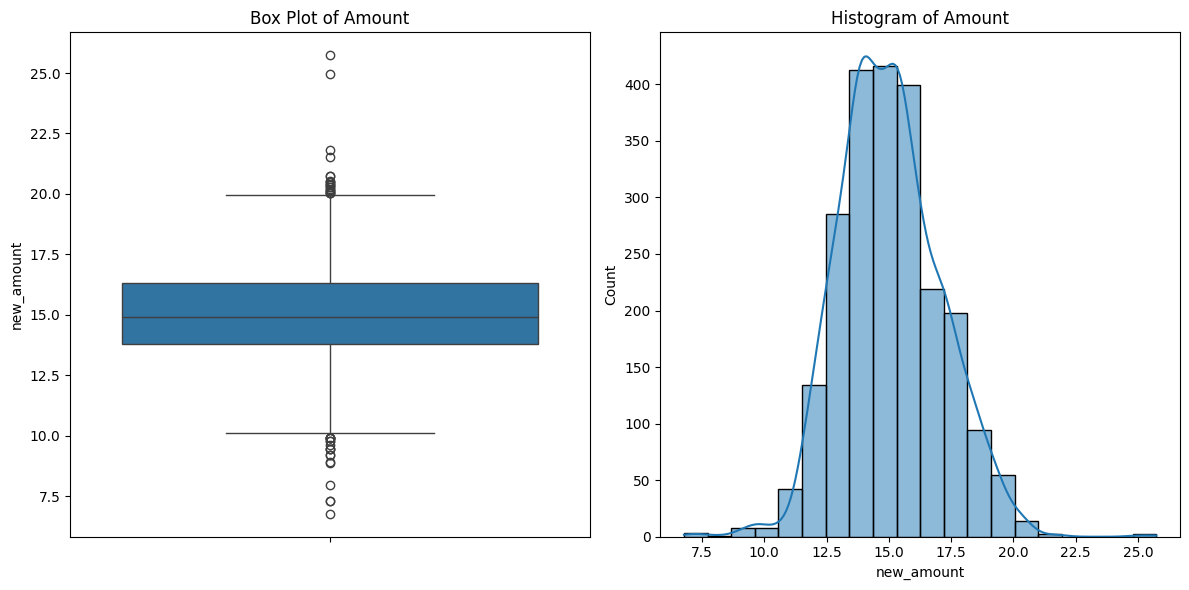

In [181]:
# Create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a box plot on the first axis
sns.boxplot(data=np.log1p(df['new_amount']), ax=axes[0])
axes[0].set_title('Box Plot of Amount')

# Plot a histogram on the second axis
sns.histplot(data=np.log1p(df['new_amount']), bins=20, ax=axes[1], kde=True)  # kde=True adds a kernel density estimate line
axes[1].set_title('Histogram of Amount')

# Adjust layout
plt.tight_layout()

# show plot
plt.show()

As seen from the box plot, there are outliers in the 'new_amount' column that the histogram plot doesn't really show,therefore it advisable to use the median as it is immune to outliers as compared to the mean.

In [182]:
df['new_amount'] = df['new_amount'].fillna(df['new_amount'].median())

#### Cleaning the 'Stage' column

In [183]:
df['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', '$1200000', 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', '$300000', 'Early seed', '$6000000',
       '$1000000', 'Seies A', 'Series A2', 'Series I', 'Angel',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt'

As seen there a lot of invalid values that need to be taken care of

- Invalid stages
- url links as entries
- missing values

In [184]:
# list of valid development stages of start-ups
valid_stages = ['Venture - Series Unknown','Seed', 'Angel', 'Series A', 'Series B', 'Pre-Seed', 'Grant', 'Series H', 
                'Series A', 'Series C', 'Series E', 'Corporate Round','Series D','Debt financing','Post-IPO Equity']

# if the value in 'Stage' is not one of the values in the valid_stages list, return null value for that row
df.loc[~df['Stage'].isin(valid_stages), 'Stage'] = np.nan

In [185]:
# Number of missing values in the 'Stage' column
df['Stage'].isna().sum()

1526

In [186]:
# fill in with the mode

df['Stage'].fillna(df['Stage'].mode()[0], inplace=True)

In [187]:
df.head()

,Company_Brand,Founded,HeadQuarter,What_it_does,Investor,Amount,Stage,Year,Num_of_Investors,Num_of_Founders,Sector,Currency,new_amount
0,Aqgromalin,2019.0,Chennai,Cultivating Ideas for Profit,Angel investors,200000.0,Seed,2020,1.0,2.0,Technology,Not Specified,200000.0
1,Krayonnz,2019.0,Bangalore,An academy-guardian-scholar centric ecosystem ...,GSF Accelerator,100000.0,Seed,2020,1.0,2.0,Education,Not Specified,100000.0
2,PadCare Labs,2018.0,Pune,Converting bio-hazardous waste to harmless waste,Venture Center,nan,Seed,2020,1.0,1.0,Healthcare,Not Specified,3000000.0
3,NCOME,2020.0,Delhi,Escrow-as-a-service platform,"Venture Catalysts, PointOne Capital",400000.0,Seed,2020,2.0,1.0,Finance,Not Specified,400000.0
4,Gramophone,2016.0,Indore,Gramophone is an AgTech platform enabling acce...,"Siana Capital Management, Info Edge",340000.0,Seed,2020,2.0,4.0,Technology,Not Specified,340000.0


In [188]:
df.isna().sum()

Company_Brand         0
Founded             768
HeadQuarter           0
What_it_does          0
Investor              0
Amount                0
Stage                 0
Year                  0
Num_of_Investors    624
Num_of_Founders     544
Sector                0
Currency              0
new_amount            0
dtype: int64

#### Cleaning the 'Founded' Column

In [189]:
df['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

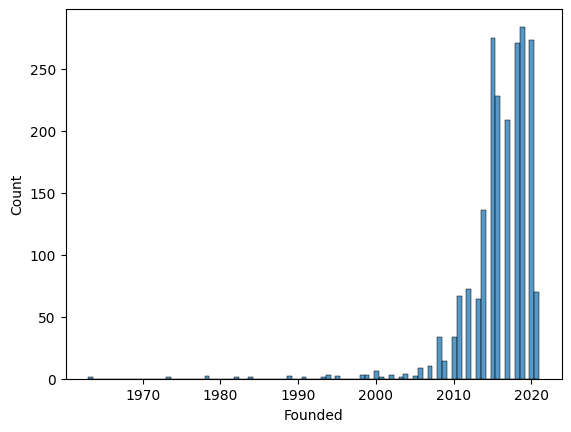

In [190]:
sns.histplot(df['Founded'])
plt.show()

In [191]:
# Will treat this as a categorical column and rather fill in with the mode
df['Founded'].fillna(df['Founded'].mode()[0], inplace=True)

#### Cleaning 'Num_of_Investors' Column

This is one of the columns added to the original dataset. Due to the missing values in the column used to create this new column, there are some missing values that need to be filled in, but before I will have a look at the distribution of this column.

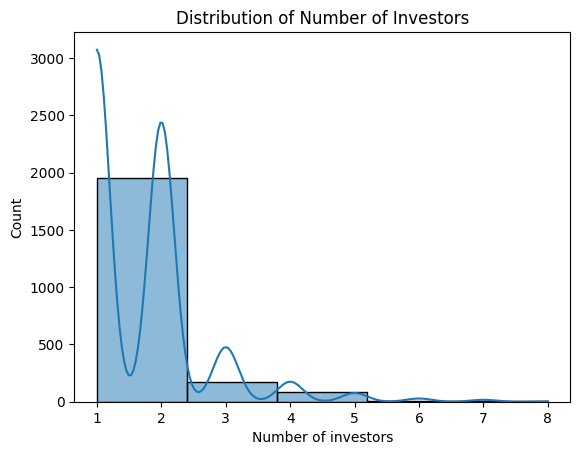

In [192]:
# Plotting the distribution of this column
sns.histplot(df['Num_of_Investors'], bins=5, kde=True)
plt.title('Distribution of Number of Investors')
plt.xlabel('Number of investors')
plt.show()

Due to it's skewness, it is advisable to use a central tendency value which is immune to skewness and outliers.

In [193]:
# impute with the median
df['Num_of_Investors'].fillna(df['Num_of_Investors'].median(), inplace=True)

In [194]:
# recheck for any missing values
df['Num_of_Investors'].isna().any()

False

In [195]:
# convert column to integer data type
df['Num_of_Investors'] = df['Num_of_Investors'].astype(int)

#### Cleaning 'Num_of_Founders' Column

I will go ahead and do same like I did for the previous one

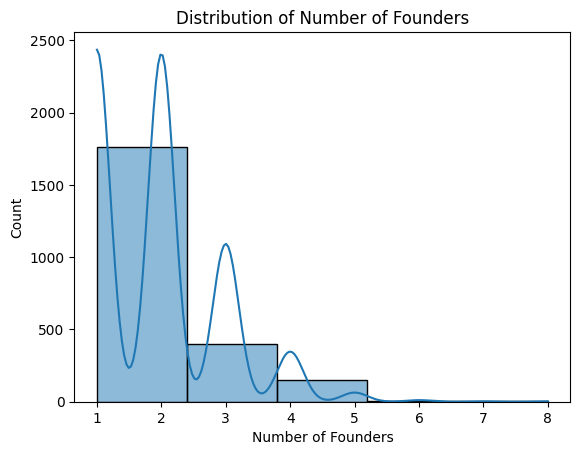

In [196]:
# Plotting the distribution of this column
sns.histplot(df['Num_of_Founders'], bins=5, kde=True)
plt.title('Distribution of Number of Founders')
plt.xlabel('Number of Founders')
plt.show()

In [197]:
# impute with the median
df['Num_of_Founders'].fillna(df['Num_of_Founders'].median(), inplace=True)

In [198]:
# convert column to integer data type
df['Num_of_Founders'] = df['Num_of_Founders'].astype(int)

In [199]:
# Summary Statistics
df.describe()

,Founded,Year,Num_of_Investors,Num_of_Founders,new_amount
count,2856.000000,2856.000000,2856.000000,2856.000000,2.856000e+03
mean,2016.855742,2020.017857,1.775910,1.950980,9.848950e+07
std,3.954760,1.087759,0.826993,0.859914,3.097961e+09
min,1963.000000,2018.000000,1.000000,1.000000,8.770600e+02
25%,2015.000000,2020.000000,1.000000,1.000000,1.000000e+06
50%,2018.000000,2020.000000,2.000000,2.000000,3.000000e+06
75%,2019.000000,2021.000000,2.000000,2.000000,8.000000e+06
max,2021.000000,2021.000000,8.000000,8.000000,1.500000e+11


In [302]:
# Checking for correlation coefficients between the Numerical columns
num_columns = ['Num_of_Founders', 'Num_of_Investors', 'new_amount']
df[num_columns].corr()

,Num_of_Founders,Num_of_Investors,new_amount
Num_of_Founders,1.000000,0.093891,-0.027045
Num_of_Investors,0.093891,1.000000,0.008456
new_amount,-0.027045,0.008456,1.000000


In [305]:
# pairplot
sns.pairplot(df[num_columns])
plt.show()

In [200]:
# Number of Startups by location (Top 10)

location_count = df['HeadQuarter'].value_counts().sort_values(ascending=False)[:10]
location_count

HeadQuarter
Bangalore    1037
Mumbai        468
Gurugram      319
Delhi         318
Chennai       106
Pune          104
Noida          86
Hyderabad      76
Haryana        29
Ahmedabad      29
Name: count, dtype: int64

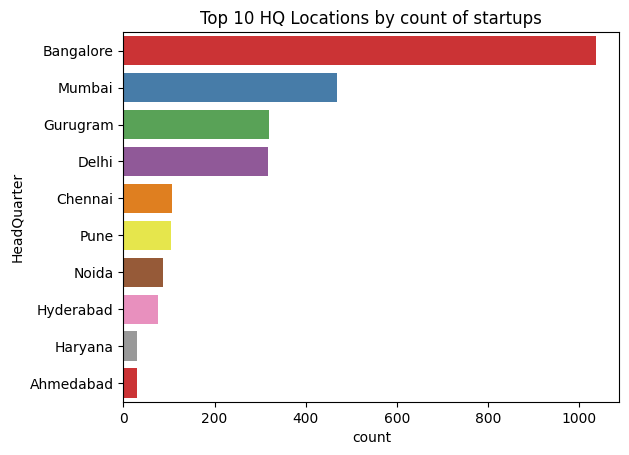

In [291]:
# Plotting location count 
sns.countplot(data=df, y='HeadQuarter', order=location_count.index, palette='Set1')
plt.title('Top 10 HQ Locations by count of startups')
plt.show()

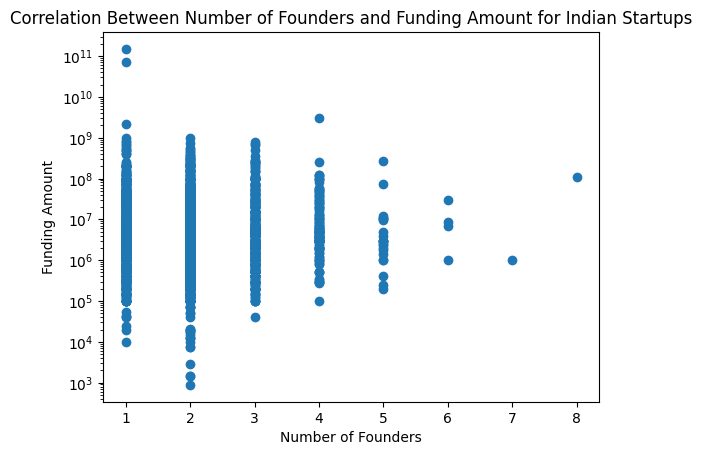

In [204]:
# Relationship between Number of founders and funding amount
# Create scatter plot
plt.scatter(df['Num_of_Founders'], df['new_amount'])
plt.yscale('log')
plt.title('Correlation Between Number of Founders and Funding Amount for Indian Startups')
plt.xlabel('Number of Founders')
plt.ylabel('Funding Amount')
plt.show()



### Hypothesis Testing

Hypothesis testing is a statistical method used to make inferences about population parameters based on sample data. It involves the formulation of null and alternative hypotheses, the calculation of a test statistic from the sample data, and the comparison of the test statistic to a critical value or p-value to a significance level to make a decision.

Since I have stated 3 hypothesis for this project, I will be testing each hypothesis using the appropriate method.



#### Hypothesis 1: Startups headquartered in major metropolitan areas of India likely to receive higher funding amounts than other areas

Null Hypothesis (H0) : the funding amount between the two regions (metropolitan areas and other areas) doesn't vary significantly.

Alternate Hypothesis (H0) : the funding amount between the two regions (metropolitan areas and other areas) vary significantly.



But before I go ahead to test this hypothesis, I'll go ahead and look at the distribution, just to get a hint or an idea of what I might be expecting

In [209]:
# Separate the data into two groups: major metropolitan areas and other areas
metropolitan = df[df['HeadQuarter'].isin(['Mumbai', 'Bangalore', 'Delhi'])]['new_amount']
other_areas = df[~df['HeadQuarter'].isin(['Mumbai', 'Bangalore', 'Delhi'])]['new_amount']


In [210]:
# convert to pandas dataframe so as to access the 'new_amount' column for histogram plot
metro = pd.DataFrame(metropolitan)
other = pd.DataFrame(other_areas)

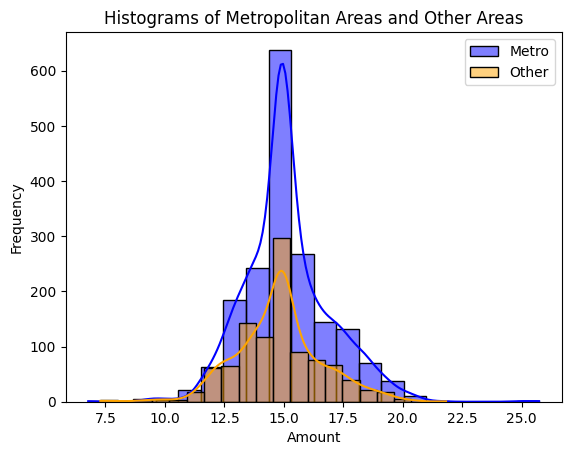

In [211]:
# Create the histograms
sns.histplot(np.log1p(metro['new_amount']), color='blue', label='Metro', kde=True, bins=20)
sns.histplot(np.log1p(other['new_amount']), color='orange', label='Other', kde=True, bins= 20)

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histograms of Metropolitan Areas and Other Areas')

# Show the plot
plt.show()

In [212]:

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(metropolitan, other_areas)


print('Hypothesis Testing Using the Independent sample t-test\n-----------------------------------------------------')

# Print the results
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Hypothesis Testing Using the Independent sample t-test
-----------------------------------------------------
T-statistic: 1.04
P-value: 0.30
Failed to reject the null hypothesis


Therefore, at a significance level of 5%, there is enough evidence to conclude that the funding amount between metropolitan areas and other regions doesn't really vary significantly.

#### Hypothesis 2: Startups with multiple investors are likely to receive higher amounts of funding in India

Null hypothesis(H0): There is no strong positive correlation between the number of investors and the funding amount.

Alternate hypothesis(H0): There is a strong positive correlation between the number of investors and the funding amount.

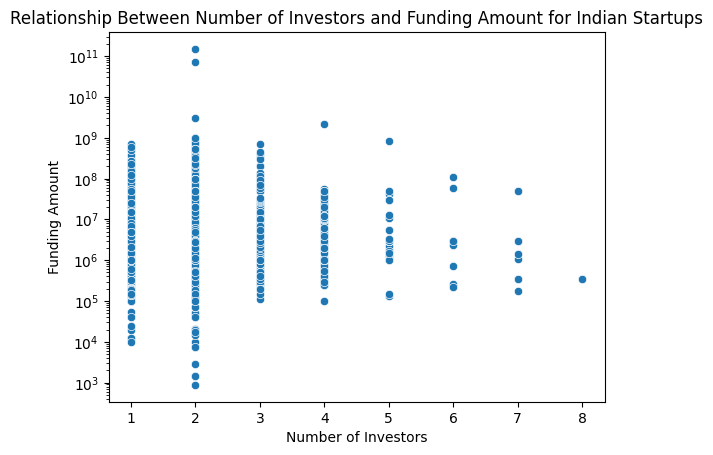

In [213]:
# Relationship between Number of Investors and funding amount
sns.scatterplot(x = df['Num_of_Investors'], y = df['new_amount'])
plt.yscale('log')
plt.title('Relationship Between Number of Investors and Funding Amount for Indian Startups')
plt.xlabel('Number of Investors')
plt.ylabel('Funding Amount')
plt.show()

Looking at the scatter plot, the pattern doesn't really show any strong relationship whether positive or negative between number of investors and funding amount. I will go ahead and test my hypothesis to make decision 

In [214]:
# Define variables
x = df['Num_of_Investors']
y = df['new_amount']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(x, y)

print("Hypothesis Testing Using the Pearson's Correlation test\n--------------------------------------------------------")

# Print results
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis and conclude that there is a significant linear relationship between the variables.")
else:
    print("Fail to reject null hypothesis and conclude that there is no significant linear relationship between the variables.")

Hypothesis Testing Using the Pearson's Correlation test
--------------------------------------------------------
Pearson correlation coefficient: 0.00845602224081102
P-value: 0.651475577258943
Fail to reject null hypothesis and conclude that there is no significant linear relationship between the variables.


Therefore, at a 5% significant level, there is enough evidence to conclude that there is no significant linear relationship between the number of investors and the funding amount.
 
In simple terms, you are not likely to receive high fund amount just because you have multiple investors as compared to those with less number of investors.

#### Hypothesis 3: Funding amounts vary across sectors.

Null Hypothesis(H0): The average funding amount across regions are equal.

Alternate Hypothesis(H0): The average funding amount across regions are not equal (At least, one differs from the others).

In [215]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('new_amount ~ C(Sector)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)


print('Hypothesis Testing Using the ANOVA test\n-----------------------------------------------')
# Print ANOVA table
print(anova_table)

# Interpret results
p_value = anova_table['PR(>F)'][0]
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis and conclude that the average funding amounts vary across sectors.")
else:
    print("Fail to reject null hypothesis and conclude that the average funding amounts doesn't significantly differ across sectors.")

Hypothesis Testing Using the ANOVA test
-----------------------------------------------
                 sum_sq      df         F    PR(>F)
C(Sector)  1.006177e+20    20.0  0.522441  0.958986
Residual   2.729986e+22  2835.0       NaN       NaN
Fail to reject null hypothesis and conclude that the average funding amounts doesn't significantly differ across sectors.


Therefore, at a significance level of 5%, there is enough evidence to conclude that the funding amount across different sectors doesn't vary significantly.

#### Answering Business Questions

In this section, I am going to be answering some of the business questions that were asked at the beginning of the project.


1. what is the overall trend in funding amounts over the specified time period? 
   - Total and average funding amounts over the years?

2. Which year had the most investors?

3. Which startups received the highest funding amount for each year?
   - Which sectors are those companies from?
   - What does these companies do?

4. What are the top 5 and bottom 5 start-ups according to funding amount and Which sectors are they from?

5. What are the top 5 and bottom 5 sectors by Total Funding amount received?

6. What is the number of startups by sectors?

7. Top 10 HQ locations by average funding amounts.
   
8. What is the number of fundings per HQ locations?

9. What is the average amount of funds received by startups at different stages?

10. What is the average number of founders per startup?
    - Show a distribution plot of the number of founders.

1. what is the overall trend in funding amounts over the specified time period? 
   - Total and average funding amounts over the years?

In [216]:
# calculating total amount across different years
total_amt_per_year = df.groupby('Year')['new_amount'].sum().reset_index()
total_amt_per_year

,Year,new_amount
0,2018,7.087032e+09
1,2019,3.372433e+09
2,2020,9.080582e+10
3,2021,1.800207e+11


In [217]:
avg_amt_per_year = df.groupby('Year')['new_amount'].mean().reset_index()
avg_amt_per_year

,Year,new_amount
0,2018,1.349911e+07
1,2019,3.789251e+07
2,2020,8.631732e+07
3,2021,1.512779e+08


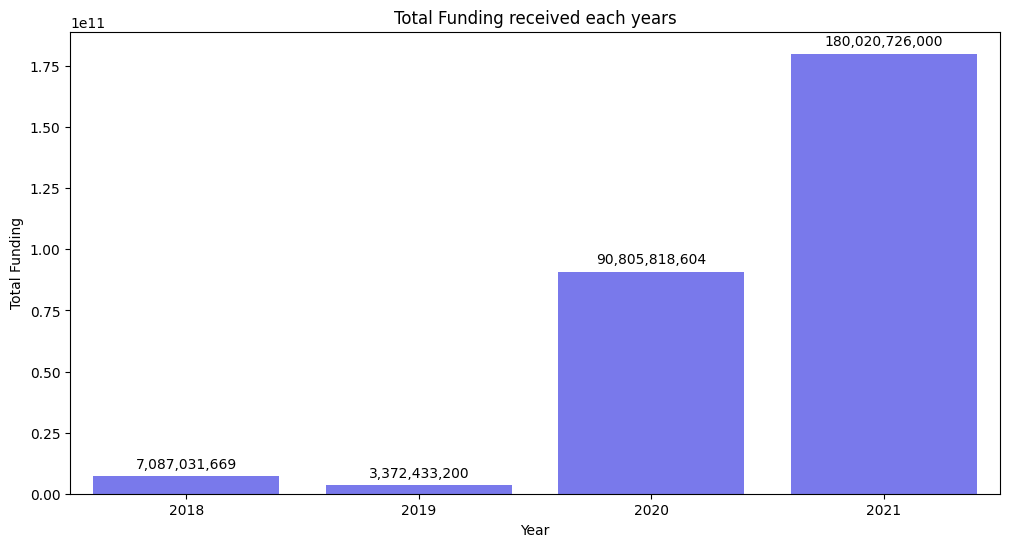

In [218]:
# Bar plot for total amount
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Year', y='new_amount', data=total_amt_per_year, color='b', alpha=0.6)

#Add values on top of bar graph
for p in bar_plot.patches:
    bar_plot.annotate('{:,.0f}'.format(p.get_height()),  # Format the value with thousand comma separator
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9), textcoords='offset points')

plt.title('Total Funding received each years')
plt.xlabel('Year')
plt.ylabel('Total Funding')
plt.show()


As seen in the diagram, 2021 comes in first as the year with the highest total funding amount with $180bn while 2019 is the year with the lowest total funding amount with $3.4bn

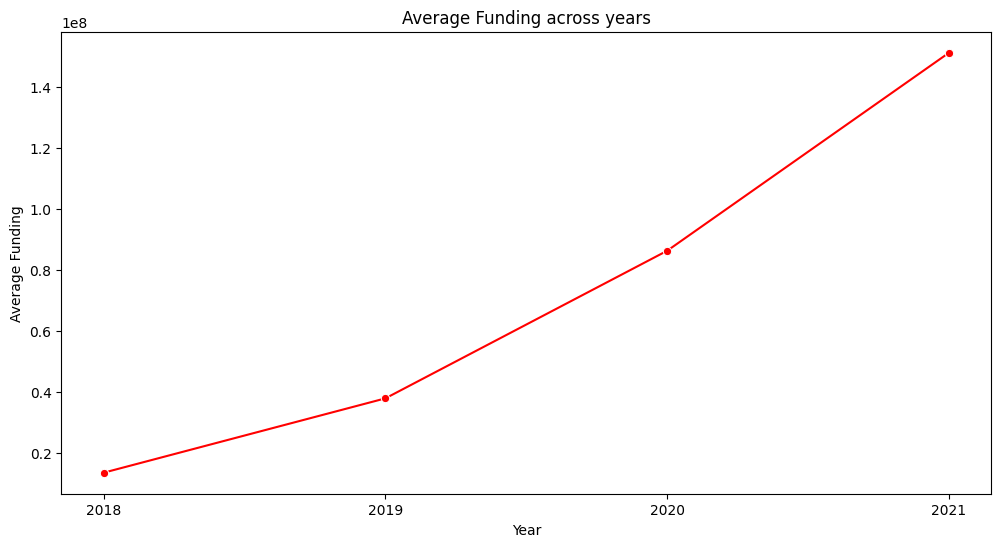

In [219]:

# lineplot of Median funding across years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='new_amount', data=avg_amt_per_year, color='r', marker='o')
# Set custom x-axis ticks (only whole years)
plt.xticks(avg_amt_per_year['Year'])

plt.title('Average Funding across years')
plt.xlabel('Year')
plt.ylabel('Average Funding')
plt.show()


The trend shows a steady increase in average funds received each year.

2. Which year had the most investors?

In [220]:
Total_investors_by_years = df.groupby('Year')['Num_of_Investors'].sum().sort_values(ascending=False)
Total_investors_by_years

Year
2021    2041
2020    1810
2018    1050
2019     171
Name: Num_of_Investors, dtype: int32

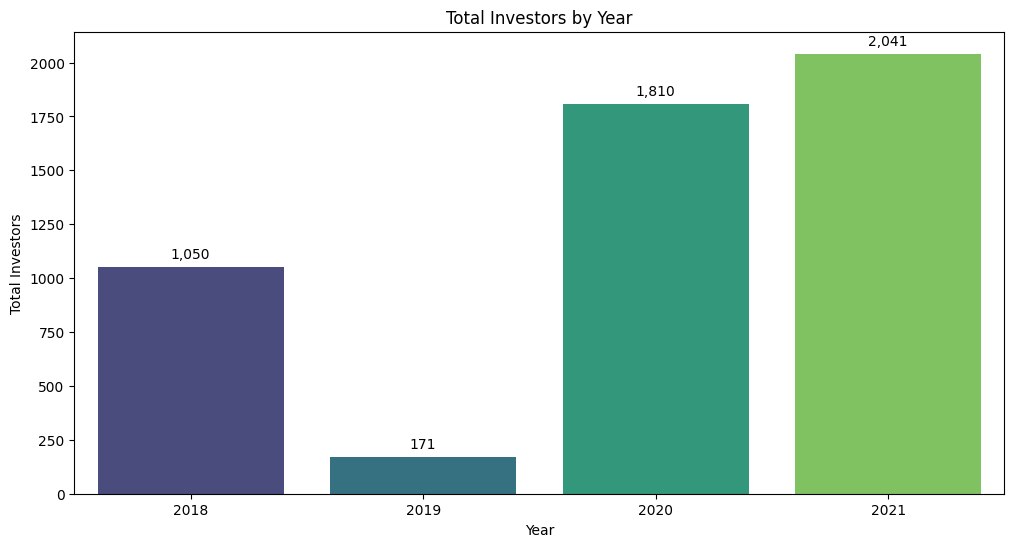

In [221]:
plt.figure(figsize=(12, 6))
plot = sns.barplot(Total_investors_by_years, palette='viridis')

#Add values on top of bar graph
for p in plot.patches:
    plot.annotate('{:,.0f}'.format(p.get_height()),  # Format the value with thousand comma separator
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9), textcoords='offset points')
plt.title('Total Investors by Year')
plt.xlabel('Year')
plt.ylabel('Total Investors')
plt.show()

As seen in  the plot above, investors swarmed the indian startup ecosystem in 2021 with 2,041 investors.

3. Which startups received the highest funding amount for each year?
   - Which sectors are those companies from?
   - Who were their Investors?
   - What does these companies do?
   

In [240]:

# Find the startups with the highest funding amount for each year
idx = df.groupby('Year').new_amount.idxmax()
highest_funding_df = df.loc[idx]

# Display the result
highest_funding_df[['Year', 'Company_Brand','new_amount', 'Sector', 'Investor']]

,Year,Company_Brand,new_amount,Sector,Investor
2365,2018,Swiggy,1.000000e+09,Consumables,Not Specified
2875,2019,Oyo,6.930000e+08,Hospitality,"MyPreferred Transformation, Avendus Finance, SoftBank"
280,2020,Reliance Retail Ventures Ltd,7.000000e+10,Consumer Services,"Silver Lake, Mubadala Investment Company"
1128,2021,Alteria Capital,1.500000e+11,FinTech,Not Specified


In [238]:
pd.set_option('display.max_colwidth', None) # so I can see everything in the 'What_it_does' column
highest_funding_df[['Company_Brand','What_it_does']]

,Company_Brand,What_it_does
2365,Swiggy,Swiggy is a food ordering and delivery company that provides food service solutions for restaurants.
2875,Oyo,Provides rooms for comfortable stay
280,Reliance Retail Ventures Ltd,"Reliance Retail offers online shopping and a chain of neighborhood stores, supermarkets, and wholesale/specialty stores."
1128,Alteria Capital,Alteria Capital is a Venture debt firm .


From the above findings;

- A startup called Swiggy got the highest funding in 2018. They received $1bn from an anonymous investor.
- A startup that provides room for comfortable stay, called Oyo, received a fund of $693M in 2019 which was the highest for that year.
- Reliance Retail Ventures Ltd, which is a startup in the Consumer services sector received the highest funding in 2020, an amount of $70bn.
- Alteria Capital is a FinTech startup that received the highest funding in 2021. They received a huge fund of $150bn. They are also the top of the list of startups with the highest funding.

4. What are the top 5 and bottom 5 start-ups according to funding amount and Which sectors are they from?

In [241]:
# Top 5 Startups by funding amount
top_5_companies = df.sort_values(by='new_amount', ascending=False).head(5)



top_5 = top_5_companies[['Company_Brand', 'Sector', 'new_amount']]
top_5

,Company_Brand,Sector,new_amount
1128,Alteria Capital,FinTech,1.500000e+11
280,Reliance Retail Ventures Ltd,Consumer Services,7.000000e+10
317,Snowflake,Technology,3.000000e+09
328,Reliance,Other,2.200000e+09
1401,VerSe Innovation,Technology,1.000000e+09


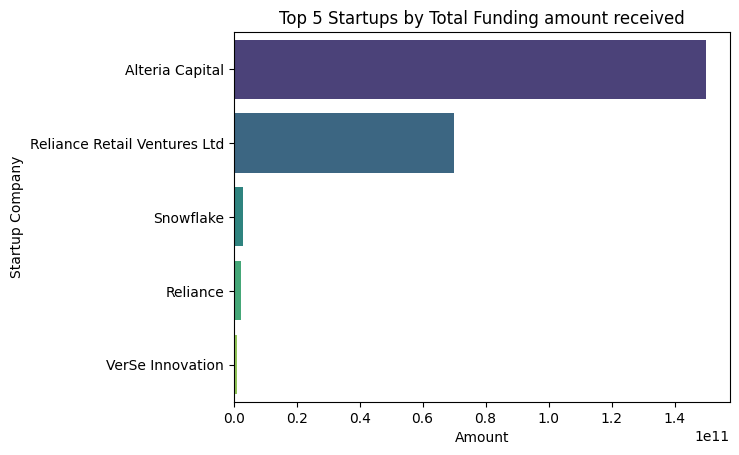

In [242]:

# Add labels and a title
sns.barplot(x = top_5['new_amount'], y = top_5['Company_Brand'], palette='viridis')
plt.xlabel('Amount')
plt.ylabel('Startup Company')
plt.title('Top 5 Startups by Total Funding amount received')
plt.show()

In [225]:
# Top 5 Startups by funding amount
bottom_5_companies = df.sort_values(by='new_amount', ascending=False).tail(5)



bottom_5 = bottom_5_companies[['Company_Brand', 'Sector', 'new_amount']]
bottom_5

,Company_Brand,Sector,new_amount
2283,Antariksh Waste Ventures Pvt ltd,Technology,7308.87
2522,ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED,Other,2923.55
2362,Next Digital Solutions,Marketing,1461.77
2428,Classworks India,Education,1461.77
2334,Ultraviolette Automotive,Energy,877.06


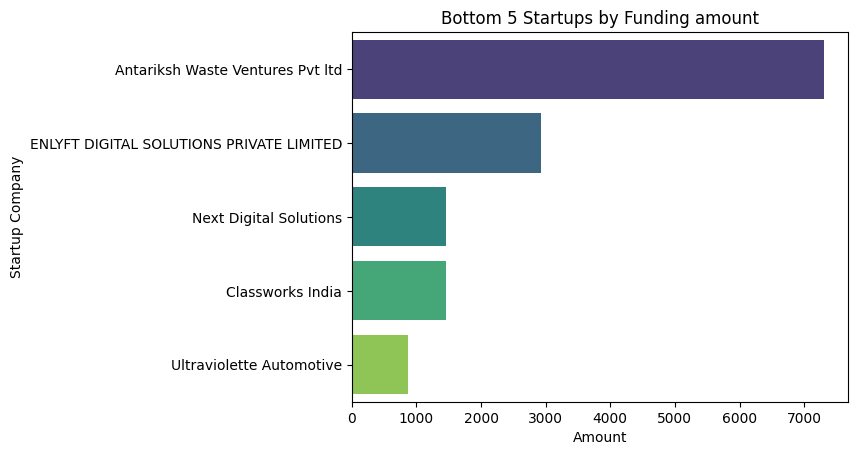

In [243]:
# Add labels and a title
sns.barplot(x = bottom_5['new_amount'], y = bottom_5['Company_Brand'], palette='viridis')
plt.xlabel('Amount')
plt.ylabel('Startup Company')
plt.title('Bottom 5 Startups by Funding amount')
plt.show()

5. What are the top 5 and bottom 5 by Total Funding amount received?

In [227]:
# Top 5 sectors by Total Funding
top_5_sectors = df.groupby('Sector')['new_amount'].sum().sort_values(ascending=False).head(5)
top_5_sectors

Sector
FinTech              1.554346e+11
Consumer Services    7.104638e+10
Technology           1.052642e+10
Education            6.138270e+09
Other                6.025022e+09
Name: new_amount, dtype: float64

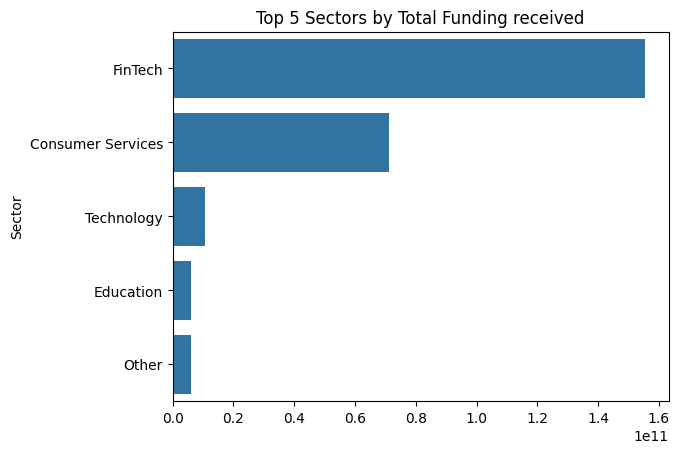

In [228]:
sns.barplot(x = top_5_sectors.values , y = top_5_sectors.index)
plt.title('Top 5 Sectors by Total Funding received')
plt.show()

In [229]:
# Bottom 5 sectors by Total Funding
bottom_5_sectors = df.groupby('Sector')['new_amount'].sum().sort_values(ascending=False).tail(5)
bottom_5_sectors

Sector
Lifestyle      6.078898e+08
Real Estate    5.465723e+08
Marketing      1.165433e+08
Agriculture    9.127700e+07
Manufacture    7.985839e+07
Name: new_amount, dtype: float64

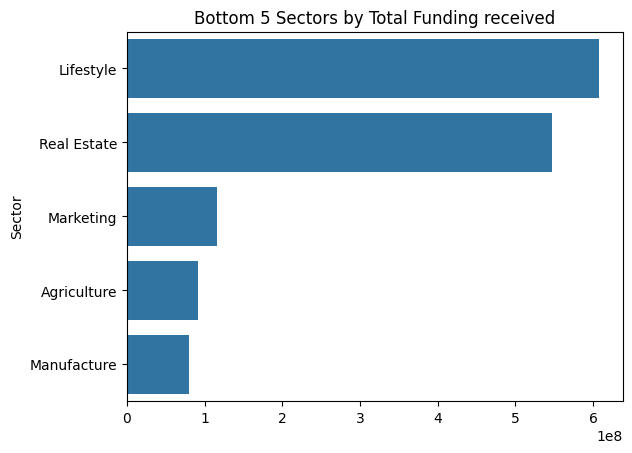

In [230]:
sns.barplot(x = bottom_5_sectors.values , y = bottom_5_sectors.index)
plt.title('Bottom 5 Sectors by Total Funding received')
plt.show()

6. What is the number of startups by sectors?

In [244]:
# Number of startups by sectors
sector_count = df['Sector'].value_counts().sort_values(ascending=False)
sector_count = pd.DataFrame(sector_count)
sector_count

,count
Sector,
Technology,556
FinTech,295
Education,262
Automotive,243
Other,239
Finance,153
E-Commerce,152
Consumables,145
Logistics,133


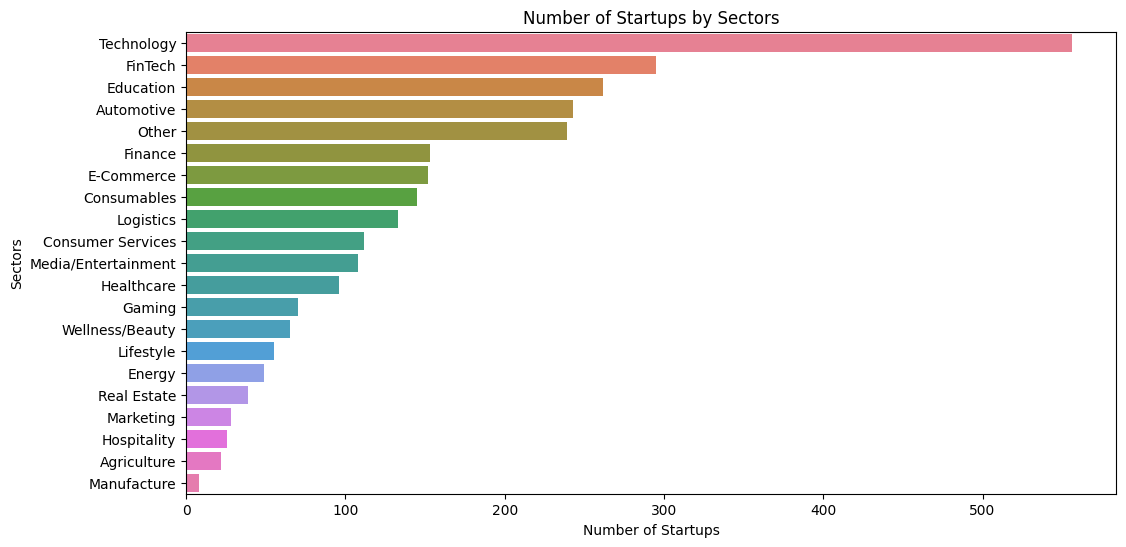

In [250]:

plt.figure(figsize=(12, 6))
sns.barplot(x = sector_count['count'], y = sector_count.index, data = sector_count, palette='husl')
plt.xlabel('Number of Startups')
plt.ylabel('Sectors')
plt.title('Number of Startups by Sectors')
plt.show()

7. Top 10 locations by average funding amounts.

In [260]:
top_10_HQ = df.groupby('HeadQuarter')['new_amount'].mean().sort_values(ascending=False).head(10)
top_10_HQ = pd.DataFrame(top_10_HQ)
top_10_HQ

,new_amount
HeadQuarter,
Mumbai,4.935203e+08
California,4.406857e+08
Shanghai,4.000000e+08
Kalpakkam,2.100000e+08
Beijing,2.000000e+08
Jiaxing,1.760000e+08
Berlin,1.700000e+08
San Ramon,1.500000e+08
Faridabad,1.173089e+08


Text(0.5, 1.0, 'Top 10 HQ Locations by Average Funding')

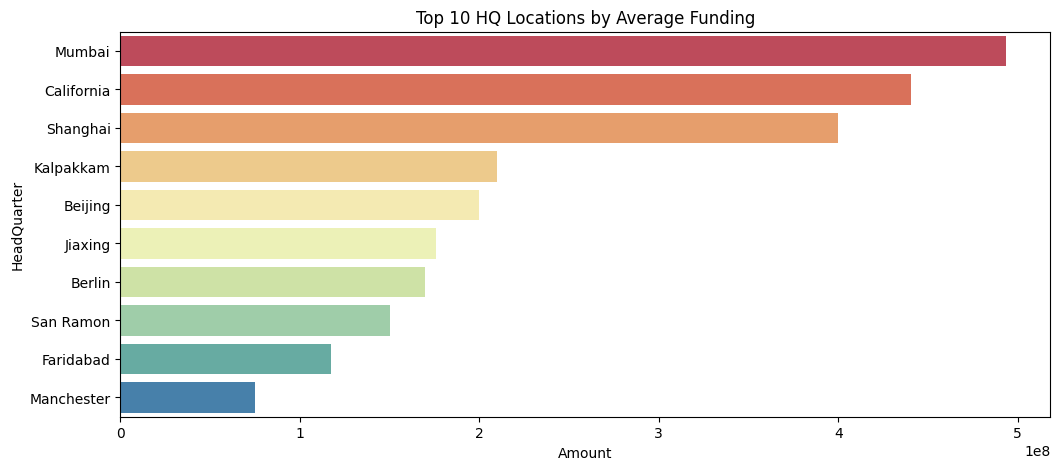

In [268]:
plt.figure(figsize=(12, 5))
sns.barplot(x = top_10_HQ.new_amount, y = top_10_HQ.index, data = top_10_HQ, palette = "Spectral")
plt.xlabel('Amount')
plt.title('Top 10 HQ Locations by Average Funding')

8. What is the number of fundings per HQ locations?

In [271]:
HQ_count = df['HeadQuarter'].value_counts()
pd.DataFrame(HQ_count)

,count
HeadQuarter,
Bangalore,1037
Mumbai,468
Gurugram,319
Delhi,318
Chennai,106
...,...
Paris,1
Banglore,1
Bangaldesh,1


9. What is the average amount of funds received by startups at different stages?

In [278]:
avg_fund_per_stage = df.groupby('Stage')['new_amount'].mean().sort_values(ascending=False)
avg_fund_per_stage = pd.DataFrame(avg_fund_per_stage)
avg_fund_per_stage

,new_amount
Stage,
Series H,5.781250e+08
Post-IPO Equity,1.434871e+08
Seed,1.218047e+08
Series E,1.184163e+08
Series D,7.056076e+07
Series C,4.738205e+07
Corporate Round,3.647508e+07
Series B,2.811849e+07
Venture - Series Unknown,9.717041e+06


Text(0.5, 1.0, 'Average Funding Per Stage')

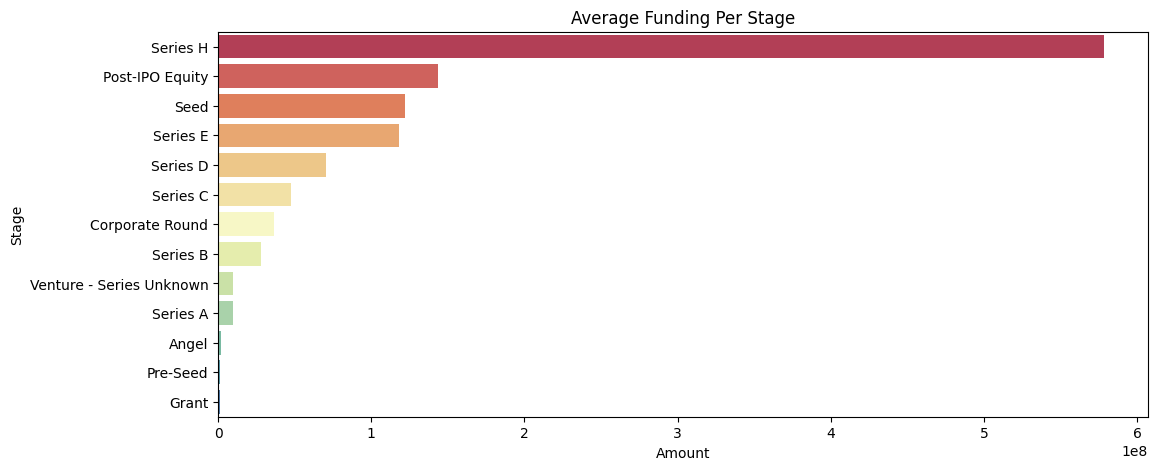

In [279]:
plt.figure(figsize=(12, 5))
sns.barplot(x = avg_fund_per_stage.new_amount, y = avg_fund_per_stage.index, data = avg_fund_per_stage, palette = "Spectral")
plt.xlabel('Amount')
plt.title('Average Funding Per Stage')

10. What is the median number of founders per startup?
    - Show a distribution plot of the number of founders.

In [280]:
median_num_of_founders = df['Num_of_Founders'].median()
median_num_of_founders

2.0

<Axes: xlabel='Num_of_Founders', ylabel='Density'>

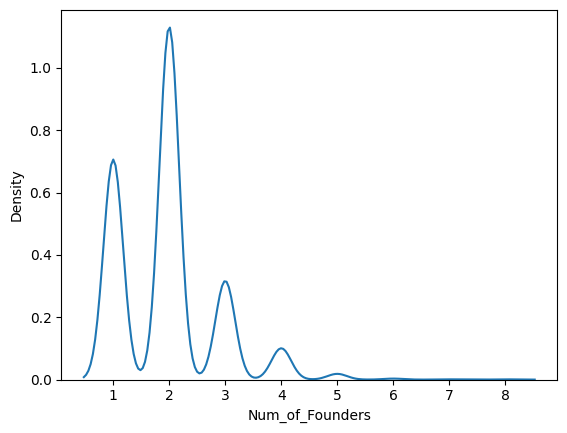

In [283]:
sns.kdeplot(df['Num_of_Founders'])